In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#"import pandas kita gunakan untuk menyajikan hal-hal pengolahan data yang rumit menjadi sederhana, membantu mempercepat proses penyajian data dan analasis data"
#"import numpy digunakan untuk mengolah data numerik"
#"import mathplotlib digunakan untuk menampilkan hasil analisis menggunakan grafik"

In [2]:
df = pd.read_csv('suicide.csv')
print(df)

          country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987      

In [3]:
df.shape
#Terdapat 27820 baris dan 12 kolom

(27820, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

<AxesSubplot:>

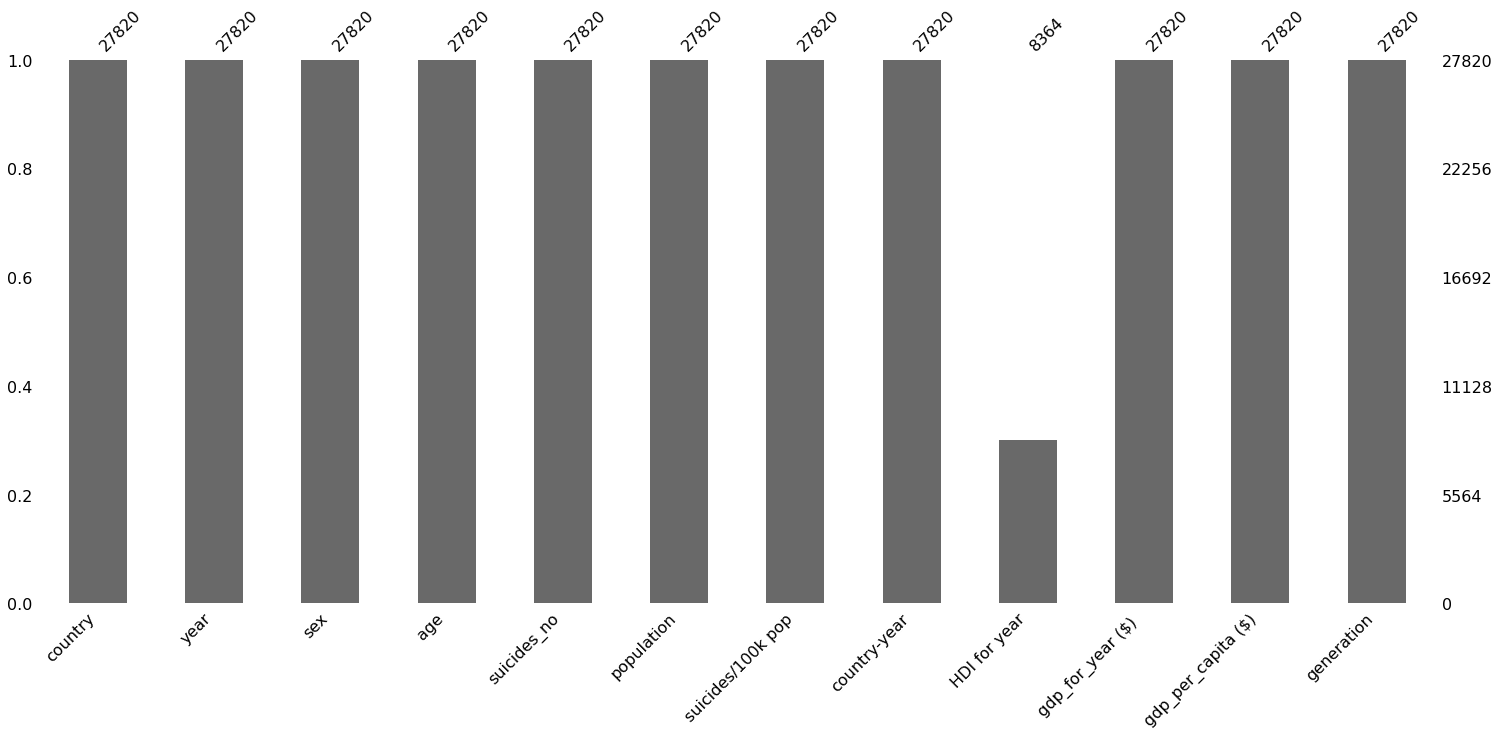

In [6]:
import missingno as msno
msno.bar(df)

In [7]:
df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [8]:
df1 = df.rename(columns={'gdp_per_capita ($)':'gdp_per_capita'})

In [9]:
df1.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [10]:
suicide_country = df1.groupby('country').gdp_per_capita.sum()
suicide_country

country
Albania                   490788
Antigua and Barbuda      3385212
Argentina                2944044
Armenia                   558428
Aruba                    4069236
                          ...   
United Arab Emirates     3035664
United Kingdom          11869908
United States           14608296
Uruguay                  2561016
Uzbekistan                257712
Name: gdp_per_capita, Length: 101, dtype: int64

In [11]:
x = suicide_country.index.values
y = suicide_country.values

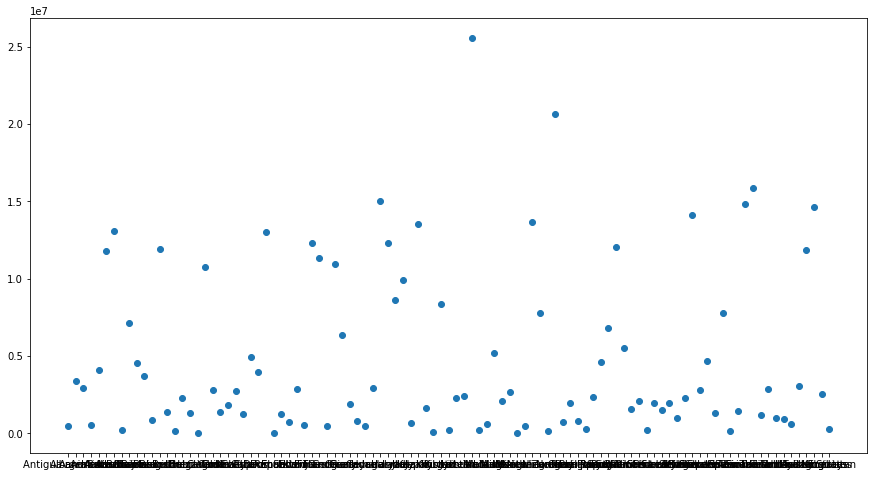

In [12]:
plt.figure(figsize=(15,8))
plt.scatter(x,y)
plt.show()

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


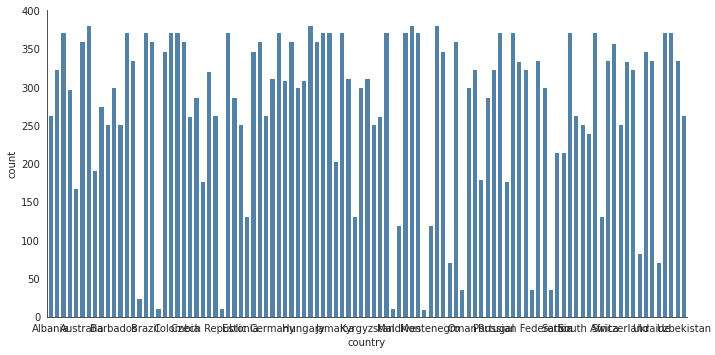

In [13]:
with sns.axes_style('white'):
    g = sns.catplot('country', data=df1, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels(step=5)

In [14]:
df1['country'].value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [15]:
suicide_year = df1.groupby('year').gdp_per_capita.sum()
suicide_year

year
1985     3508548
1986     4104636
1987     5645760
1988     5870508
1989     6068424
1990     7531260
1991     7782096
1992     8195232
1993     8231796
1994     9438756
1995    11858508
1996    11600736
1997    11398596
1998    11506728
1999    12780864
2000    12865476
2001    12677892
2002    13017420
2003    15187104
2004    17895936
2005    20317212
2006    21563784
2007    24709620
2008    26936208
2009    24145248
2010    25193196
2011    26936148
2012    26058300
2013    26911368
2014    25665252
2015    19516008
2016     4106420
Name: gdp_per_capita, dtype: int64

In [16]:
x1 = suicide_year.index.values
y1 = suicide_year.values

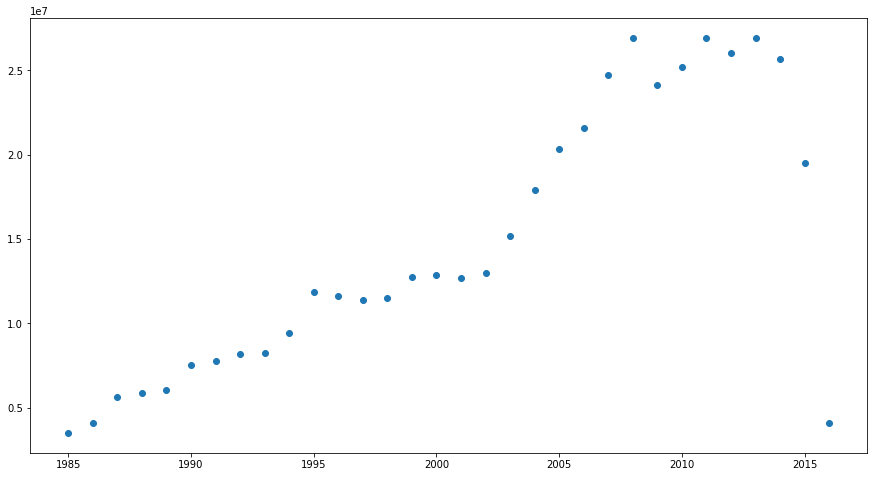

In [17]:
plt.figure(figsize=(15,8))
plt.scatter(x1,y1)
plt.show()

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


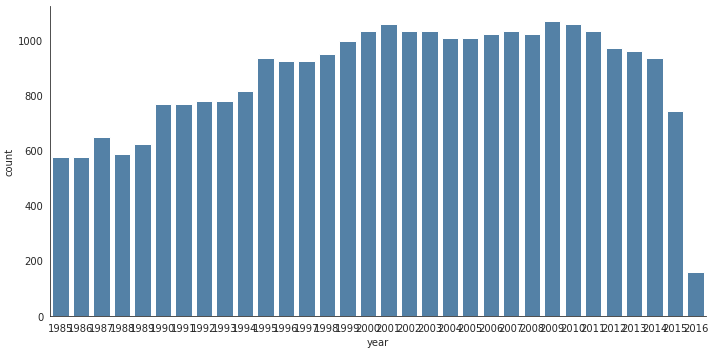

In [18]:
with sns.axes_style('white'):
    g = sns.catplot('year', data=df1, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels()

In [19]:
df1['year'].value_counts()

2009    1068
2010    1056
2001    1056
2002    1032
2000    1032
2011    1032
2007    1032
2003    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1997     924
1996     924
1994     816
1993     780
1992     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [20]:
df1.groupby(['year', 'country']).gdp_per_capita.sum()

year  country            
1985  Antigua and Barbuda     46200
      Argentina               39168
      Australia              148488
      Austria                117108
      Bahamas                136716
                              ...  
2016  Netherlands            481080
      Qatar                  624840
      Romania                100200
      Sweden                 555940
      Thailand                67130
Name: gdp_per_capita, Length: 2321, dtype: int64

In [21]:
suicide_age= df1.groupby('age').gdp_per_capita.sum()
suicide_age

age
15-24 years    78341054
25-34 years    78341054
35-54 years    78341054
5-14 years     77519770
55-74 years    78341054
75+ years      78341054
Name: gdp_per_capita, dtype: int64

In [22]:
x2 = suicide_age.index.values
y2 = suicide_age.values

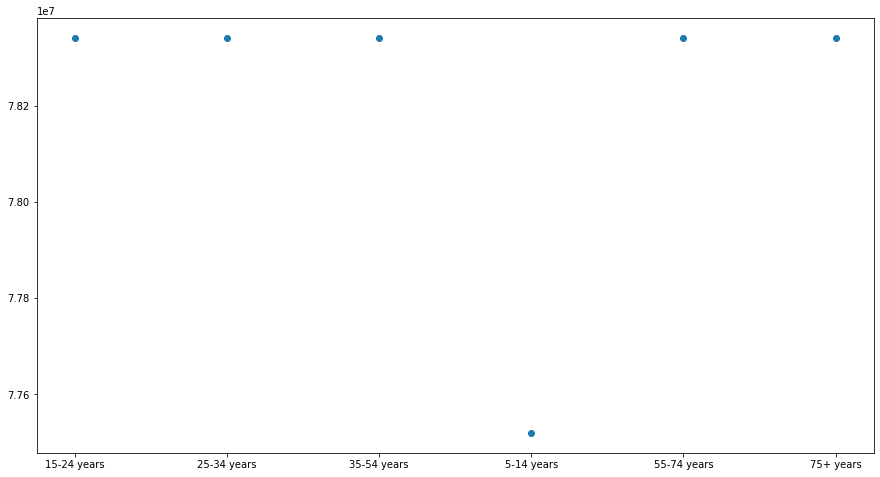

In [23]:
plt.figure(figsize=(15,8))
plt.scatter(x2,y2)
plt.show()

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


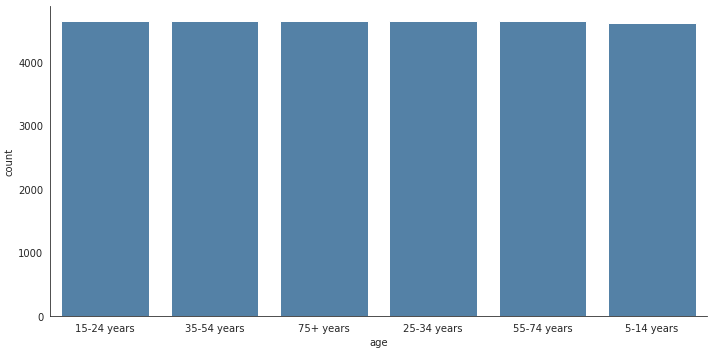

In [24]:
with sns.axes_style('white'):
    g = sns.catplot('age', data=df1, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels()

In [25]:
df1['age'].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [26]:
suicide_sex = df1.groupby('sex').gdp_per_capita.sum()
suicide_sex

sex
female    234612520
male      234612520
Name: gdp_per_capita, dtype: int64

In [27]:
x3 = suicide_sex.index.values
y3 = suicide_sex.values

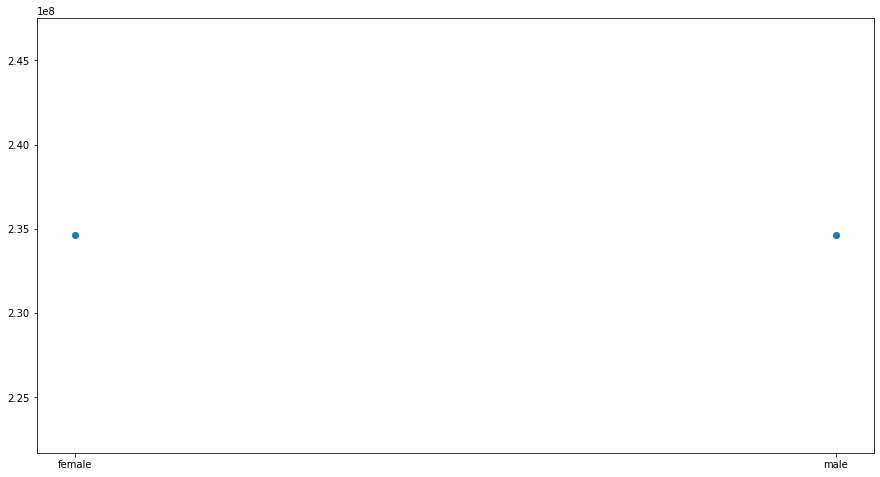

In [28]:
plt.figure(figsize=(15,8))
plt.scatter(x3,y3)
plt.show()

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


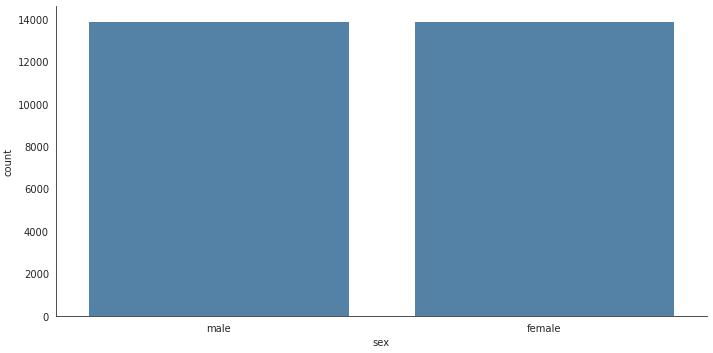

In [29]:
with sns.axes_style('white'):
    g = sns.catplot('sex', data=df1, aspect=2, kind='count', color='steelblue')
    g.set_xticklabels()

In [30]:
df1['sex'].value_counts()

male      13910
female    13910
Name: sex, dtype: int64

Machine Learning

In [31]:
x1_1 = suicide_year.index.values.reshape(-1,1)

In [32]:
y1_1 = suicide_year.values

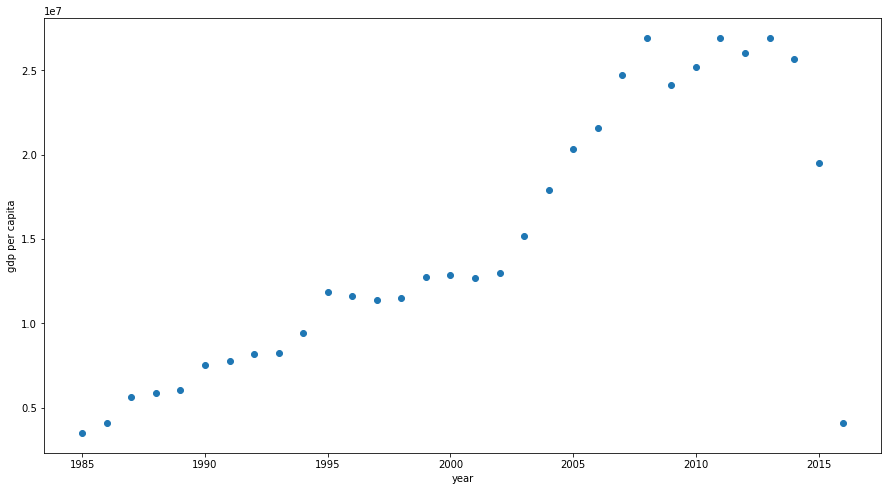

In [33]:
plt.figure(figsize=(15,8))
plt.scatter(x1_1,y1_1)
plt.xlabel('year')
plt.ylabel('gdp per capita')
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x1_1,y_1)

NameError: name 'y_1' is not defined

In [ ]:
reg.coef_

array([683640.3313783])

In [ ]:
reg.intercept_

-1352959200.4222884

In [ ]:
y1_1

array([ 3508548,  4104636,  5645760,  5870508,  6068424,  7531260,
        7782096,  8195232,  8231796,  9438756, 11858508, 11600736,
       11398596, 11506728, 12780864, 12865476, 12677892, 13017420,
       15187104, 17895936, 20317212, 21563784, 24709620, 26936208,
       24145248, 25193196, 26936148, 26058300, 26911368, 25665252,
       19516008,  4106420], dtype=int64)

In [ ]:
y1_1plot = reg.predict(x1_1)

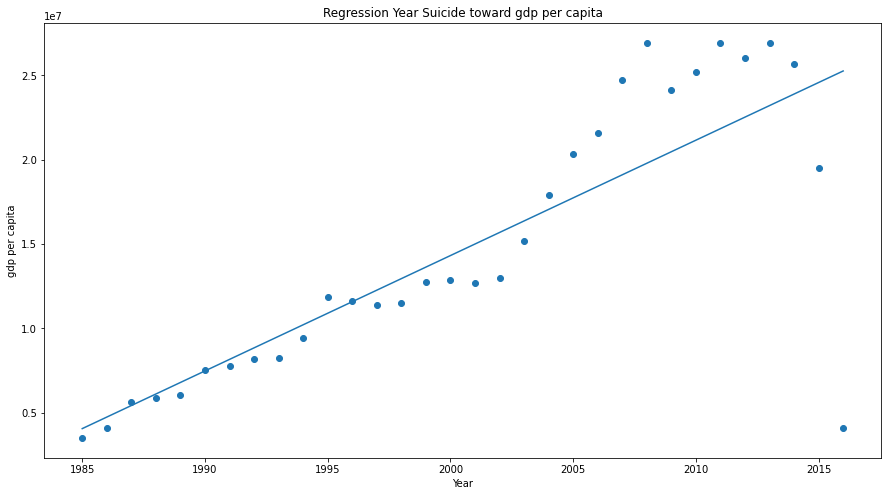

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x1_1,y1_1)
plt.plot(x1_1,y1_1plot)
plt.xlabel('Year')
plt.ylabel('gdp per capita')
plt.title('Regression Year Suicide toward gdp per capita')
plt.savefig('Regression Year Suicide toward gdp per capita.png')
plt.show()

In [ ]:
reg.score(x_1,y_1) *100

65.1294402738551

In [ ]:
reg.predict([[2021]])

array([28677909.29325509])